<a href="https://colab.research.google.com/github/Back2Basics/Pandas-Talks/blob/master/austin_python_users_group_pandas_intro_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json


Last time I introduced the Series and the DataFrame.  Summary: The Series is one block of data with an index. A DataFrame is a bunch of Series stuck together.

Both have an index column that auto populates with integers.  We'll talk about what we can do with that later.


In [ ]:
#the 3 important pieces
s = pd.Series(data=[100,2000,30000], index=['a', 'b','c'], dtype = np.uint16)
s

a      100
b     2000
c    30000
dtype: uint16

In [ ]:
s.groupby(s.index).sum()

a      100
b     2000
c    30000
dtype: uint16

There are special functions to create series type data.  One of them is working with Dates.

In [ ]:
pd.Timestamp("2016-04-01 10:15:15.12345")

Timestamp('2016-04-01 10:15:15.123450')

In [ ]:
d = pd.date_range(start='aug 2 2016 1:00am', end='sept 1 2016 2:00pm', freq='1H') # also you could specify periods
d

DatetimeIndex(['2016-08-02 01:00:00', '2016-08-02 02:00:00',
               '2016-08-02 03:00:00', '2016-08-02 04:00:00',
               '2016-08-02 05:00:00', '2016-08-02 06:00:00',
               '2016-08-02 07:00:00', '2016-08-02 08:00:00',
               '2016-08-02 09:00:00', '2016-08-02 10:00:00',
               ...
               '2016-09-01 05:00:00', '2016-09-01 06:00:00',
               '2016-09-01 07:00:00', '2016-09-01 08:00:00',
               '2016-09-01 09:00:00', '2016-09-01 10:00:00',
               '2016-09-01 11:00:00', '2016-09-01 12:00:00',
               '2016-09-01 13:00:00', '2016-09-01 14:00:00'],
              dtype='datetime64[ns]', length=734, freq='H')

Timestamp Aliases is where to look for those frequency strings.  Also take a look at anchored offsets to get really crazy with dateranges (first monday of the month)

For more check out the latest vid from Aileen Nielsen from SciPy 2016 on Pandas Timeseries Analysis on https://www.youtube.com/watch?v=JNfxr4BQrLk 

You can rename the columnHeaders.  Just make sure the number of elements in this list matches the number of columns.

In [ ]:
df = pd.DataFrame([100,300,200], columns=['fruitsCount'])
df

,fruitsCount
0,100
1,300
2,200


You can change the headers of the index column as well as give the columnHeaders a title.

In [ ]:
df = df.rename_axis(axis=0, mapper='integers')
df = df.rename_axis(axis=1, mapper='columnHeaders')
df


columnHeaders,fruitsCount
integers,
0,100
1,300
2,200


Other examples of loading data are: 
    

my_csv = pd.read_csv('my_csv.csv')

hdf= pd.read_hdf('my_hdf5.hdf5')

xl = pd.read_excel('my_excelfile.xls')

my_json = pd.read_json('my.json')


but here is my favorite:

Copy the data from http://stackoverflow.com/questions/18161926/pandas-data-frame-from-dictionary

In [ ]:
# my_data = pd.read_clipboard()   # uncomment this line to get data from the clipboard after you copy ^

With this you can take any table you find on the web (HTML, google spreadsheets, Excel) and highlight the contents and a good majority of the time you will be able to bring it in without any need to save it to a file and then re-import it.

Thank you to the new wave of open data available from the state of Texas.  Including this dataset from The Texas Ethics Commission. https://www.ethics.state.tx.us/tec/procedures.htm


In [ ]:
xl = pd.read_excel('CTA_Office_Sought.xls')

In [ ]:
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF
0,69296,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen
1,68368,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.
2,42143,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid
3,65293,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted
4,26545,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.


You can access data in the column like a dictionary.

hmm what is going on here.

In [ ]:
xl['FILER_NAME'] #uh ohh  It couldn't find FILER_NAME

KeyError: 'FILER_NAME'

Can you spot the problem?

In [ ]:
xl.columns

Index(['FILER_ID       ', 'FILER_TYPE     ', 'FILER_NAME     ',
       'CTA_SGHT       ', 'TRES_START     ', 'OFFC_HELD      ',
       'OFFC_START     ', 'OFFC_END       ', 'FILER_NAML     ',
       'FILER_NAMF     '],
      dtype='object')

Lets fix this.  Pandas style.

In [ ]:
xl.columns = xl.columns.str.strip()

In [ ]:
xl.columns

Index(['FILER_ID', 'FILER_TYPE', 'FILER_NAME', 'CTA_SGHT', 'TRES_START',
       'OFFC_HELD', 'OFFC_START', 'OFFC_END', 'FILER_NAML', 'FILER_NAMF'],
      dtype='object')

Ahhh so much better.  I was able to loop over all the entries at once.  I treated them all as a str and then had all my str operations like strip().


In [ ]:
for x in range(10):
    print('No for statemements were needed.  Let me repeat that.') 

No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.
No for statemements were needed.  Let me repeat that.


EH Hem. Like I was saying, you can access info in a DataFrame dictionary style or you can access the columns like it was an attribute in a class.  Both of these will produce the same results

In [ ]:
xl.FILER_NAME.head()

0         Carnes, J. Allen
1       Cotten, Joe S. Jr.
2              Miller, Sid
3                Cruz, Ted
4    Garza, Antonio O. Jr.
Name: FILER_NAME, dtype: object

In [ ]:
xl['FILER_NAME'].head()

0         Carnes, J. Allen
1       Cotten, Joe S. Jr.
2              Miller, Sid
3                Cruz, Ted
4    Garza, Antonio O. Jr.
Name: FILER_NAME, dtype: object

In [ ]:
xl.FILER_NAME.str.upper().head(20)

0              CARNES, J. ALLEN
1            COTTEN, JOE S. JR.
2                   MILLER, SID
3                     CRUZ, TED
4         GARZA, ANTONIO O. JR.
5        PAXTON, W. KENNETH JR.
6          WILLIAMSON, BARRY A.
7           COLLIER, MICHAEL E.
8                  COMBS, SUSAN
9           HEGAR, GLENN A. JR.
10       HILDERBRAN, HARVEY RAY
11         SANDERS, BENJAMIN D.
12            HALL, JENNIFER A.
13              MEDINA, JUAN M.
14            STANKO, MARIAN K.
15           STOVALL, ROBERT A.
16               CASTRO, ERASMO
17    GRAHAM, DOROTHY MORGAN A.
18             MEDINA, AMBER L.
19             FLINT, GEORGE B.
Name: FILER_NAME, dtype: object

In [ ]:
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF
0,69296,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen
1,68368,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.
2,42143,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid
3,65293,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted
4,26545,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.


In [ ]:
xl.ThisSyntaxWillNotAddAColumn = 5
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF
0,69296,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen
1,68368,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.
2,42143,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid
3,65293,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted
4,26545,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.


In [ ]:
xl['ThisAddsAColumn'] = 5
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF,ThisAddsAColumn
0,69296,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen,5
1,68368,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.,5
2,42143,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid,5
3,65293,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted,5
4,26545,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.,5


Careful with this command when you are using existing data.  You could overwrite existing data.

In [ ]:
xl['FILER_ID']=5
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF,ThisAddsAColumn
0,5,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen,5
1,5,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.,5
2,5,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid,5
3,5,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted,5
4,5,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.,5


Now for something a bit more dynamic.

In [ ]:
from pandas.tseries.offsets import *

xl['TRES_END'] = xl.TRES_START + DateOffset(days=7) #adds a week to an entire column and puts it in column "TRES_END"
xl.head()

,FILER_ID,FILER_TYPE,FILER_NAME,CTA_SGHT,TRES_START,OFFC_HELD,OFFC_START,OFFC_END,FILER_NAML,FILER_NAMF,ThisAddsAColumn,TRES_END
0,5,COH,"Carnes, J. Allen",Agriculture Commissioner,2015-01-21,NaN,NaT,NaN,Carnes,J. Allen,5,2015-01-28
1,5,COH,"Cotten, Joe S. Jr.",Agriculture Commissioner,2013-12-18,NaN,NaT,NaN,Cotten,Joe S.,5,2013-12-25
2,5,COH,"Miller, Sid",Agriculture Commissioner,2013-10-23,Agriculture Commissioner,2015-01-01,NaN,Miller,Sid,5,2013-10-30
3,5,COH,"Cruz, Ted",Attorney General,2009-01-16,NaN,NaT,NaN,Cruz,Ted,5,2009-01-23
4,5,COH,"Garza, Antonio O. Jr.",Attorney General,1994-01-03,Railroad Commissioner Pl 01,1999-01-12,2002-11-30 00:00:00,Garza,Antonio O.,5,1994-01-10


Help me to understand this column of data.

In [ ]:
xl.CTA_SGHT.describe()

count                     1553
unique                     831
top       State Representative
freq                        44
Name: CTA_SGHT, dtype: object

### Understanding how two columns of data compare with each other.

In [ ]:
pd.crosstab(xl["OFFC_HELD"],xl["CTA_SGHT"],margins=True)

CTA_SGHT,Agriculture Commissioner,Attorney General,Comptroller,"Court Of Appeals, Justice Dist 001","Court Of Appeals, Justice Dist 001 Pl 02","Court Of Appeals, Justice Dist 001 Pl 03","Court Of Appeals, Justice Dist 001 Pl 04","Court Of Appeals, Justice Dist 001 Pl 09","Court Of Appeals, Justice Dist 002 Pl 02","Court Of Appeals, Justice Dist 002 Pl 03",...,Supreme Court Justice Pl 01,Supreme Court Justice Pl 02,Supreme Court Justice Pl 03,Supreme Court Justice Pl 04,Supreme Court Justice Pl 05,Supreme Court Justice Pl 06,Supreme Court Justice Pl 07,Supreme Court Justice Pl 08,Supreme Court Justice Pl 09,All
OFFC_HELD,,,,,,,,,,,,,,,,,,,,,
Agriculture Commissioner,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Attorney General,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Comptroller,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Court Of Appeals, Justice Dist 001 Pl 02",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Court Of Appeals, Justice Dist 001 Pl 03",0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"Court Of Appeals, Justice Dist 001 Pl 04",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Court Of Appeals, Justice Dist 001 Pl 05",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Court Of Appeals, Justice Dist 001 Pl 06",0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Court Of Appeals, Justice Dist 001 Pl 07",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = pd.crosstab(xl["OFFC_HELD"],xl["CTA_SGHT"],margins=False).sum().sort_values()
data

CTA_SGHT
Agriculture Commissioner                      1
District Judge Dist 345                       1
District Judge Dist 346                       1
District Judge Dist 347 Nueces County         1
District Judge Dist 350 Taylor County         1
District Judge Dist 352 Tarrant County        1
District Judge Dist 353 Travis County         1
District Judge Dist 355                       1
District Judge Dist 344 Chambers County       1
District Judge Dist 356 Hardin County         1
District Judge Dist 358 Ector County          1
District Judge Dist 359 Montgomery County     1
District Judge Dist 360 Tarrant County        1
District Judge Dist 363                       1
District Judge Dist 367 Denton County         1
District Judge Dist 368 Williamson County     1
District Judge Dist 370                       1
District Judge Dist 357 Cameron County        1
District Judge Dist 342 Tarrant County        1
District Judge Dist 341 Webb County           1
District Judge Dist 340        

### Yes you can use this on the web.

In [ ]:
data.to_json()

'{"Agriculture Commissioner":1,"District Judge Dist 345":1,"District Judge Dist 346":1,"District Judge Dist 347 Nueces County":1,"District Judge Dist 350 Taylor County":1,"District Judge Dist 352 Tarrant County":1,"District Judge Dist 353 Travis County":1,"District Judge Dist 355":1,"District Judge Dist 344 Chambers County":1,"District Judge Dist 356 Hardin County":1,"District Judge Dist 358 Ector County":1,"District Judge Dist 359 Montgomery County":1,"District Judge Dist 360 Tarrant County":1,"District Judge Dist 363":1,"District Judge Dist 367 Denton County":1,"District Judge Dist 368 Williamson County":1,"District Judge Dist 370":1,"District Judge Dist 357 Cameron County":1,"District Judge Dist 342 Tarrant County":1,"District Judge Dist 341 Webb County":1,"District Judge Dist 340":1,"District Judge Dist 317":1,"District Judge Dist 318 Midland County":1,"District Judge Dist 319 Nueces County":1,"District Judge Dist 322":1,"District Judge Dist 323 Tarrant County":1,"District Judge Di

### yes this has the ability to plot using matplotlib

In [ ]:
%matplotlib inline

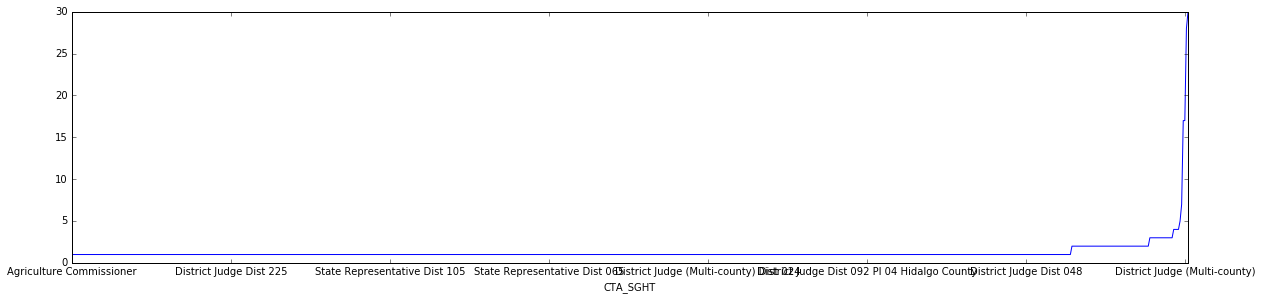

In [ ]:
data.plot(figsize=(20,4.5))